In [1]:
%matplotlib inline

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
#Load and import the data

In [4]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")

In [33]:
sample = df.sample(n=10000)
sample.click.value_counts()

0    9990
1      10
Name: click, dtype: int64

In [31]:
sample.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
2408005,0,6,19,a9e67baceb8f4a4c6008e90ea364f2af,1,u_VhdP1wN0Oy29MWb,windows_ie,114.97.63.*,106,107,...,90,0,0,31,0cd33fcb336655841d3e1441b915748d,254,31,c8758e8658b05bc3a88af7b37bdf0575,3476,"10075,10006,10059,10063,10024,10083,13403,1005..."
1957578,0,0,22,ae8e94016fc6ca5294a5715c22d1c1e9,1,u_DA8EGN3vuuc,windows_ie,58.186.189.*,0,0,...,90,FirstView,Na,30,10717,294,31,null,2821,10063
1741309,0,5,18,deb0cdc0ee2a41069000ff480874631c,1,u_DAJI339OsXp,windows_chrome,113.77.46.*,216,233,...,250,ThirdView,Na,0,7321,294,84,null,2259,null
96530,0,4,15,e4ea34780e03de73f9362f4e64a94360,1,u_Vh2xPeMqOcqZBOB,windows_chrome,121.233.247.*,80,90,...,90,0,0,148,b90c12ed2bd7950c6027bf9c6937c48a,300,148,361e128affece850342293213691a043,3386,"10063,10111"
777436,0,4,10,15b9ab53dd9c7f9d18b78b43c15f4d2b,1,u_Vh5_OkqlPTbskQC,windows_chrome,58.242.87.*,106,112,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,88,d29e59bf0f7f8243858b8183f14d4412,3358,"10083,10110"


In [29]:
#Constant bidding strategy - Just using the mean value as the bidding

In [183]:
#Constant bid price at 274 - the mean value 
def constant_bid(dataframe, bid_price, flag=0):  #Change this value for the constant
    if flag == 1:
        for i in range(len(dataframe)):
            bid_id = dataframe.iloc[i].bidid; 
            print('Bid_id: '+ bid_id + ' ,' ,'Bid_price: '+ str(bid_price))  #controlled
            
    clicks = dataframe[dataframe.payprice <= bid_price].click.value_counts().sort_index().tolist() #Changed to payprice
    total_cost = sum(dataframe[dataframe.payprice <= bid_price].payprice)
    wins= sum(dataframe[dataframe.payprice <= bid_price].click.value_counts())
    win_ratio = round((wins/dataframe.shape[0])*100,2)
    #print ('Summary | '+ 'Constant Bid price: '+ str(bid_price))
    #print ('-----------------------------------')
    #print ('Number of impressions: '+ str(dataframe.shape[0]))
    #print ('Win counts: '+ str(wins))
    #print ('Win percentage: '+ str(win_ratio)+'%')
    if len(clicks) < 2:
        CTR = 0.00 
        clicks = '0'
        #print ('Clicks: '+ clicks)
    else:
        CTR = round((clicks[1]/clicks[0])*100,5)
        #print ('Clicks: '+ str(clicks[1]))
    #print ('CTR: '+ str(CTR)+ '%')
    #print ('Total cost: '+ str(total_cost)+ ' RMB')
    return [bid_price, wins, CTR , total_cost]

def plof_df(Dataframe, bid_price)
    clicks = dataframe[dataframe.payprice <= bid_price].click.value_counts().sort_index().tolist() #Changed to payprice
    wins= sum(dataframe[dataframe.payprice <= bid_price].click.value_counts())
    if len(clicks) < 2:
        CTR = 0.00 
    else:
        CTR = round((clicks[1]/clicks[0])*100,5)
        print ('Clicks: '+ str(clicks[1]))
    
    

In [8]:
#lower boundary = 249 min bid price / upper boundary = any i.e 300-1 = 299
def random_bid(dataframe):
    for i in range(len(dataframe)):
        bid_id = dataframe.iloc[i].bidid;
        bid_price = np.random.randint(low=249,high=302);  
        print('Bid_id: '+ bid_id + ' ,' ,'Bid_price: '+ str(bid_price)) 

In [9]:
sum(sample[sample.payprice <= 274].click.value_counts())

2983

In [12]:
sample.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
918148,0,1,18,0e7c40ecdf72a92faa70403005f64b61,1,u_Vh1pPimCOodUqWz,windows_ie,113.67.156.*,216,217,...,250,1,5,0,00fccc64a1ee2809348509b7ac2a97a5,227,260,b2e35064f3549d447edbbdfb1f707c8c,3427,"10006,13866,10063,10110"
175813,0,4,0,642d185c662a9e57e22a547f2f36b2ae,1,u_Vh1V1pS0D9qhaYL,windows_firefox,112.104.102.*,393,393,...,90,0,1,0,cc9b344e950b4f8c2b96537174a343b7,227,89,d29e59bf0f7f8243858b8183f14d4412,3358,10075
2329936,0,0,3,bfba1ba19a79bba6860b6ee7de1234d0,1,u_VhLyZp50PUN2BV8,windows_ie,183.65.43.*,275,275,...,250,1,1,0,e1af08818a6cd6bbba118bb54a651961,238,159,a5d0bde104fea52ea466c77b37948424,3476,"10057,10006,13866,13403,10059,10083,10063,10110"
2122402,0,0,0,dd3e32d96f2166a2f8c11eec38342afe,1,u_VhkrLnN3LQ1fDWf,windows_ie,137.117.90.*,0,0,...,90,0,0,20,b90c12ed2bd7950c6027bf9c6937c48a,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,10063
2561433,0,5,0,745a0dba89e04660d33bb180658fe688,1,u_Vh5_1uSyPQ29qZb,windows_chrome,27.227.230.*,344,345,...,250,2,1,0,911b2d84826786018761e8c0b0a3a60c,227,227,d29e59bf0f7f8243858b8183f14d4412,3358,"13800,10024"


In [184]:
y1 = constant_bid(sample,0); y = constant_bid(sample,210)

In [186]:
y

[210, 9417, 0.095659999999999995, 657617]

In [187]:
# plot_df.reset_index(drop = True)  ------ use to reset the index

In [191]:
#Roughly 11 mins
start = time.time()
def find_opt_bid(min, max):
    list_1 = []
    for i in range(min,max):
        y= constant_bid(df, i);
        list_1 += [y]
    plot_df= pd.DataFrame(list_1)
    plot_df.columns=['Bid','Wins','CTR','Total_cost']
    return plot_df
graph_df = find_opt_bid(0,302)
end = time.time()
print(end - start)

654.0663487911224


In [192]:
graph_df

,Bid,Wins,CTR,Total_cost
0,0,531,0.00000,0
1,1,3004,0.00000,2473
2,2,6875,0.00000,10215
3,3,7743,0.00000,12819
4,4,19278,0.00000,58959
5,5,68665,0.00583,305894
6,6,84543,0.04852,401162
7,7,97598,0.04305,492547
8,8,108645,0.03959,580923
9,9,120248,0.03910,685350


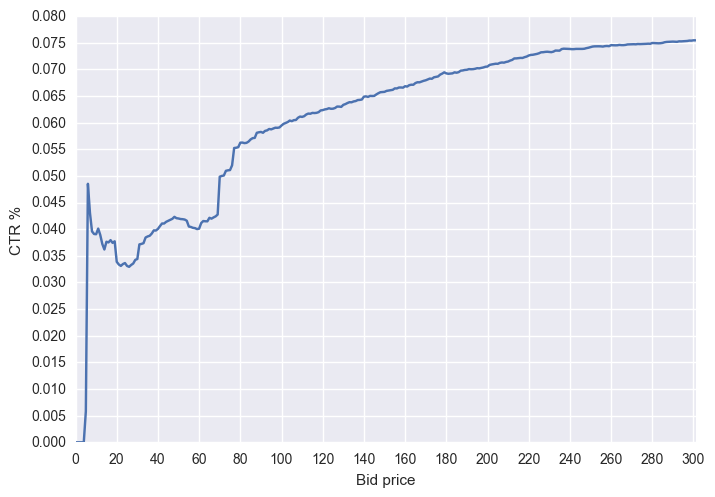

In [172]:
#Plot of CTR and bid price
plt.figure()
ax= graph_df.CTR.plot()
ax.set_ylabel('CTR %')
ax.set_xlabel('Bid price')
ax.set_xticks(np.arange(0,305,20))
ax.set_yticks(np.arange(0,0.085,0.005))
plt.grid(True)

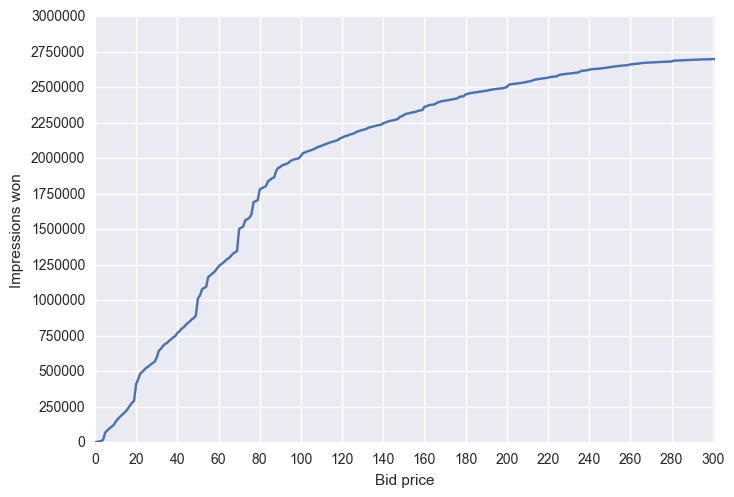

In [200]:
#Bid and impressions
plt.figure()
ax2= graph_df.Wins.plot()
ax2.set_ylabel('Impressions won')
ax2.set_xlabel('Bid price')
ax2.set_xticks(np.arange(0,305,20))
ax2.set_yticks(np.arange(0,3250000,250000))
plt.grid(True)

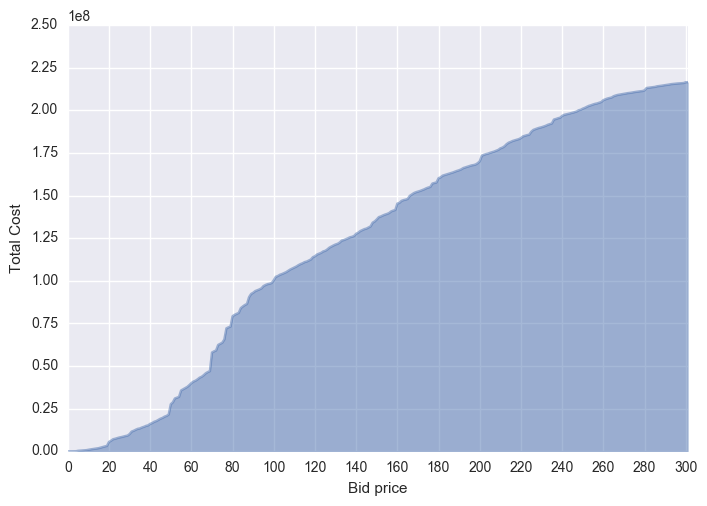

In [213]:
#Bid and cost
plt.figure()
ax3= graph_df.Total_cost.plot(kind='area',alpha=0.5)
ax3.set_ylabel('Total Cost')
ax3.set_xlabel('Bid price')
ax3.set_xticks(np.arange(0,305,20))
ax3.set_yticks(np.arange(0,260000000,25000000))
plt.grid(True)

In [ ]:
#random_bid(sample)

In [ ]:
#Evaluation tool

In [ ]:
out = random_bid(sample)

In [ ]:
example = sample[sample.bidprice <= 274].click.value_counts().sort_index().tolist()
win= sum(sample[sample.bidprice <= 274].click.value_counts())
win_ratio = round((win/sample.shape[0])*100,2)
#CTR = e

In [ ]:
sample.click.value_counts()

In [ ]:
sample[sample.bidprice <= 274].click.value_counts().tolist()

In [ ]:
sum(sample[sample.bidprice <= 274].click.value_counts())

In [ ]:
(example[1]/example[0])*100 #CTR of the won impressions

In [ ]:
example

In [ ]:
win

In [ ]:
sample.shape[0]

In [ ]:
win_ratio

In [ ]:
range(len(sample))

In [ ]:
sample.iloc[2].bidid

In [ ]:
df.bidprice.mean()

In [ ]:
df.sample(n=5)

In [ ]:
np.random.randint(low=5,high=11)   